# LINEAR REGRESSION (1 feature)

In [1]:
# import standard packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### `1) Read data`

In [2]:
# link to data

<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing" target="_blank">Click here</a>

In [3]:
# data features information

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's dollars

In [4]:
# read data from url

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", #link
                     sep="\s+", #separator
                     usecols=[5,13], #features to be used
                     names=["RM", "MEDV"]) #assign name to the features

### `2) Data Esploration`

In [5]:
# head of dataframe

boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [6]:
# dataframe dimensions

boston.shape

(506, 2)

In [7]:
# dataframe infos

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [8]:
# dataframe numeric description

boston.describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [9]:
# extraxt features column 

X = boston.drop("MEDV", axis=1).values

In [10]:
# extraxt target column

Y = boston["MEDV"].values

Text(0.5, 1.0, 'House value vs number of rooms')

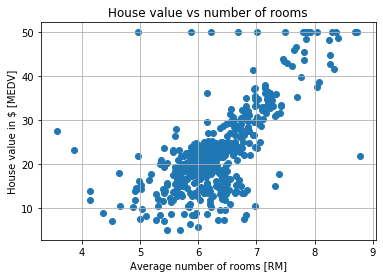

In [11]:
# plot data using matplotlib scripting layer

plt.figure()
plt.scatter(X, Y)
plt.grid()
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("House value in $ [MEDV]")
plt.title("House value vs number of rooms")

### `3) Model creation`

In [12]:
# divide data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

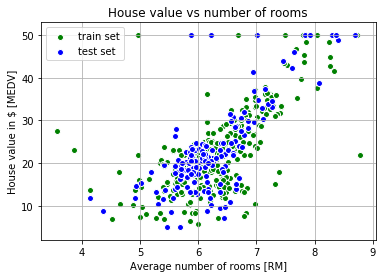

In [13]:
# plot train and test data 

plt.figure()
plt.scatter(X_train, Y_train, c="green", edgecolor="white", label="train set")
plt.scatter(X_test, Y_test, c="blue", edgecolor="white", label="test set")
plt.grid()
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("House value in $ [MEDV]")
plt.title("House value vs number of rooms")
plt.legend()

In [14]:
# train linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# linear regression parameters

intercept = model.intercept_
slope = model.coef_
print("Linear regression parameters: \n intercept= %.2f \n slope= %.2f" % (intercept, slope))

Linear regression parameters: 
 intercept= -30.54 
 slope= 8.41


In [16]:
# make predictions

Y_pred = model.predict(X_test)
Y_pred

array([21.75408643, 13.0886607 , 21.88869499, 21.40073898, 14.92270226,
       10.90127167, 25.33803921, 19.39002368, 25.79234309, 19.97052308,
       17.64011247, 11.62479266, 20.43323999, 19.65082776, 25.19501762,
       16.27720085, 27.87036266, 23.77321476, 23.26001964, 19.37319761,
       18.91889374, 21.30819559, 21.97282534, 20.10513163, 40.11132814,
       28.55181847, 25.39693046, 29.25010035, 18.36363345, 17.26993894,
       19.31430637, 14.08139879,  4.27180033, 24.27799684, 27.18049381,
       18.72539394, 18.20378579, 23.79004083, 20.51737033, 21.21565221,
       22.03171658, 26.24664696, 29.22486124, 39.26161164, 26.50745104,
       23.42828034, 20.47530516, 30.5961859 , 24.92580051, 28.48451419,
       30.05775168, 21.81297768, 20.96326117, 23.588128  , 17.4550257 ,
       24.94262658, 24.90056141, 20.9464351 , 25.44740866, 23.13382412,
       19.20493692, 19.00302409, 18.8852416 , 35.34113747, 33.4818568 ,
       24.52197485, 16.6053092 , 18.11124241, 18.90206767, 18.43

### `4) Model evaluation`

In [17]:
# calculate mse for the linear regression model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print("mean squared error: \n mse = %.2f" % (mse))

mean squared error: 
 mse = 47.26


In [18]:
# calculate R^2 for the linear regression model

from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
print("r^2 score: \n r^2 = %.2f" % (r2))

r^2 score: 
 r^2 = 0.54


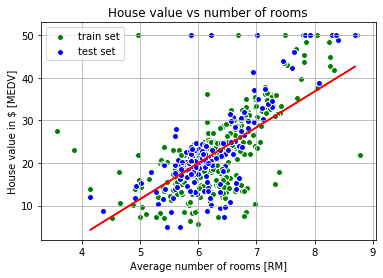

In [19]:
# plot regression line

plt.figure()
plt.scatter(X_train, Y_train, c="green", edgecolor="white", label="train set")
plt.scatter(X_test, Y_test, c="blue", edgecolor="white", label="test set")
plt.plot(X_test, Y_pred, c="red")
plt.grid()
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("House value in $ [MEDV]")
plt.title("House value vs number of rooms")
plt.legend()